In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plot

In [3]:
cast=pd.read_csv(r"C:\Users\surya\Downloads\cast\cast.csv")

In [4]:
cast

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
...,...,...,...,...,...,...
3311642,Stuttur Frakki,1993,Sveinbj?rg ??rhallsd?ttir,actress,Flugfreyja,24.0
3311643,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3311644,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3311645,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


# 1.Define a year as a "Superman year" whose films feature more Superman characters than Batman. How many years in film history have been Superman years?

In [5]:
a=cast.rename(columns={'year':'Superman year'})
b=a[(a.character=='Superman')|(a.character=='Batman')].groupby('Superman year').character.value_counts().unstack().fillna(0)
b[b.Superman > b.Batman]

character,Batman,Superman
Superman year,,
1948,0.0,1.0
1950,0.0,1.0
1951,0.0,2.0
1954,0.0,5.0
1955,0.0,1.0
1973,1.0,2.0
1978,0.0,2.0
1980,0.0,2.0
1983,0.0,2.0


# 2.How many years have been "Batman years", with more Batman characters than Superman characters?

In [6]:
a=cast.rename(columns={'year':'Batman year'})
b=a[(a.character=='Superman')|(a.character=='Batman')].groupby('Batman year').character.value_counts().unstack().fillna(0)
b[b.Batman > b.Superman]

character,Batman,Superman
Batman year,,
1938,1.0,0.0
1940,1.0,0.0
1943,1.0,0.0
1949,2.0,0.0
1953,2.0,0.0
1957,2.0,0.0
1965,1.0,0.0
1966,1.0,0.0
1967,1.0,0.0


# 3.Plot the number of actor roles each year and the number of actress roles each year over the history of film.


<AxesSubplot:xlabel='year'>

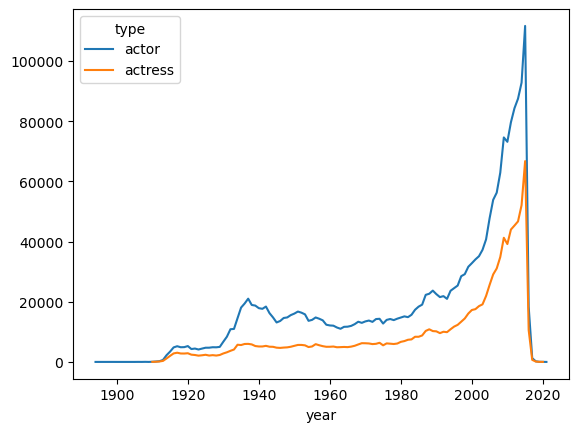

In [7]:
cast.groupby('year').type.value_counts().unstack().plot()

# 4.Plot the number of actor roles each year and the number of actress roles each year, but this time as a kind='area' plot.

<AxesSubplot:xlabel='year'>

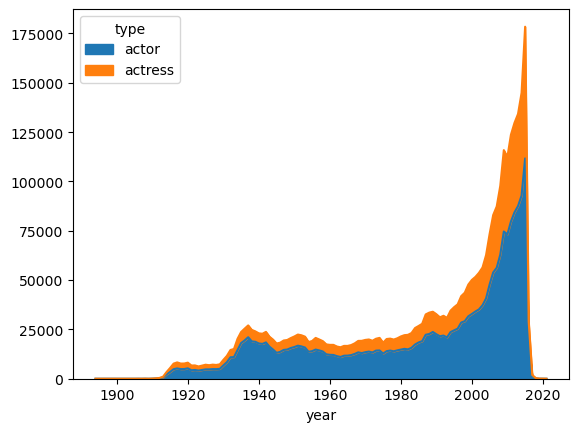

In [10]:
cast.groupby('year').type.value_counts().unstack().plot.area()

# 5.Plot the difference between the number of actor roles each year and the number of actress roles each year over the history of film.

<AxesSubplot:xlabel='year'>

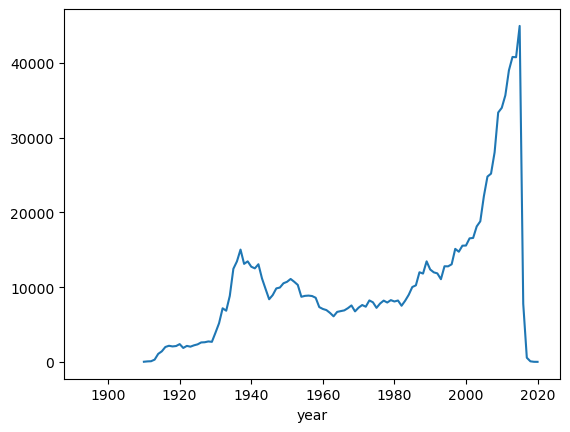

In [11]:
a = cast.groupby(['year','type']).size().unstack()
b = a['actor']-a['actress']
b.plot()

# 6.Plot the fraction of roles that have been 'actor' roles each year in the history of film.

<AxesSubplot:xlabel='year'>

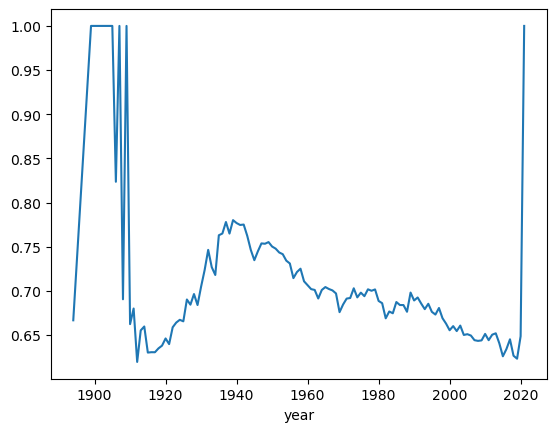

In [12]:
a=cast.groupby(['year']).type.value_counts().unstack().fillna(0)
total_roles=a['actor']+a['actress']
frac_roles=(a['actor']/total_roles)
frac_roles.plot.line()

# Plot the fraction of supporting (n=2) roles that have been 'actor' roles each year in the history of film.

<AxesSubplot:xlabel='year'>

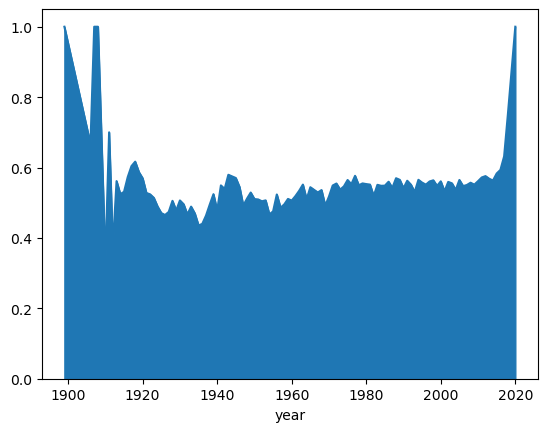

In [14]:
a=cast[cast.n==2].groupby(['year']).type.value_counts().unstack().fillna(0)
total_roles=a['actor']+a['actress']
frac_roles=(a['actor']/total_roles)
frac_roles.plot.area()

# Build a plot with a line for each rank n=1 through n=3, where the line shows what fraction of that rank's roles were 'actor' roles for each year in the history of film.

<AxesSubplot:xlabel='year'>

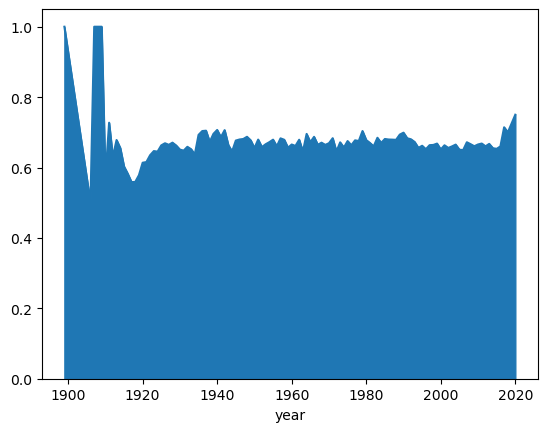

In [20]:
a=cast[(cast.n==1)|(cast.n==3)].groupby(['year']).type.value_counts().unstack().fillna(0)
total_roles=a['actor']+a['actress']
frac_roles=(a['actor']/total_roles)
frac_roles.plot.area()